# **Gerekli Kütüphaneler**

**Scikit-Learn**

Scikit-learn sürekli olarak geliştirilmekte ve iyileştirilmekte ve çok aktif bir kullanıcı topluluğuna sahip olan bir açık kaynak kodlu kütüphanedir. Bir çok son teknoloji makine öğrenimi algoritması ve her algoritma hakkında kapsamlı [dökümantasyon](https://scikit-learn.org/stable/index.html) içerir.
Scikit-learn çok popüler bir araçtır ve makine öğrenimi için en önemli Python kütüphanesidir. Endüstri ve akademide yaygın olarak kullanılır ve çevrimiçi olarak çok sayıda öğretici ve kod parçası mevcuttur.
[User Guide](https://scikit-learn.org/stable/user_guide.html)


**Numpy, Pandas, Matplotlib gibi kütüphanelerin Makine Öğrenmesi kapsamında çok önemli ve sıkça kullanılan kütüphaneler oldukları unutulmamalıdır**

In [22]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.8 MB/s eta 0:00:00


In [23]:
!pip install scikit-learn

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn


#  Iris Çiçeği Çeşitlerini Sınıflandırma

Basit bir makine öğrenimi uygulamasını inceleyerek ilk modelimizi oluşturacağız. Bu süreçte bazı temel kavramları ve terimleri tanıtacağız.

Diyelim ki bir hobi botanikçisi, bulduğu bazı iris çiçeklerinin türlerini ayırt etmek istiyor. Her iris çiçeği için bazı ölçümler toplamış: taç yapraklarının (petal) uzunluğu ve genişliği ile çanak yapraklarının (sepal) uzunluğu ve genişliği. Tüm bu ölçümler santimetre cinsindendir. 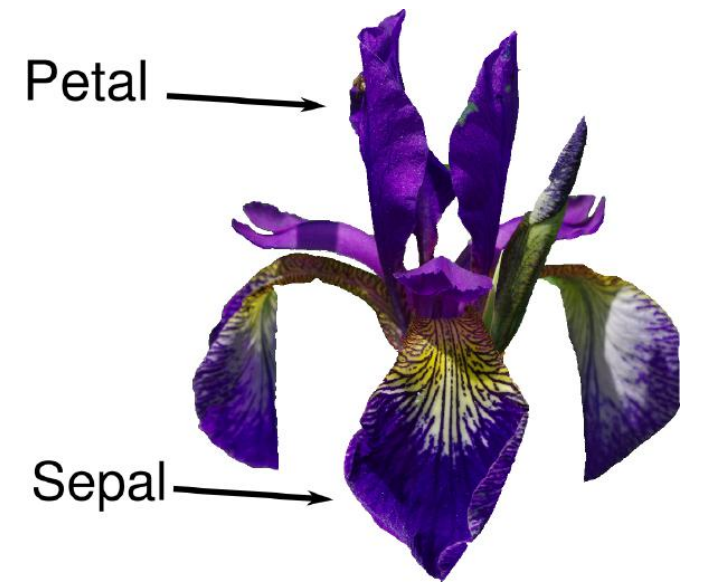

Ayrıca, bir uzman botanikçi tarafından daha önce belirlenmiş ve türü kesin olarak bilinen bazı iris çiçeklerinin ölçümlerine de sahiptir. Bu irisler setosa, versicolor veya virginica türlerine aittir. Hobi botanikçimizin doğada yalnızca bu üç türle karşılaşacağını varsayalım.

Amacımız, türü bilinen iris çiçeklerinin ölçümlerinden öğrenebilen bir makine öğrenimi modeli geliştirmek ve bu modeli kullanarak yeni bir iris çiçeğinin türünü tahmin etmektir.
Ölçümlerini bildiğimiz ve doğru iris türünü kesin olarak bildiğimiz için bu, gözetimli öğrenme (supervised learning) problemidir. Bu problemde, birkaç farklı seçenekten birini (iris türünü) tahmin etmek istiyoruz. Bu tür bir problem, sınıflandırma (classification) problemine bir örnektir.

Olası çıktıların (farklı iris türlerinin) her biri sınıf (class) olarak adlandırılır. Veri kümesindeki her iris çiçeği, üç sınıftan birine aittir. Bu nedenle, bu problem üç sınıflı bir sınıflandırma problemi olarak tanımlanır.

Tek bir veri noktası (bir iris çiçeği) için istenen çıktı, o çiçeğin türüdür. Belirli bir veri noktası için çiçeğin ait olduğu tür, etiket (label) olarak adlandırılır.


In [25]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

*load_iris fonksiyonunun döndürdüğü iris nesnesi, Bunch adlı bir obje türüdür. Bu obje, bir sözlüğe (dictionary) oldukça benzerdir ve anahtar-değer (key-value) çiftleri içerir:*

In [26]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


*DESCR anahtarının değeri, veri kümesi hakkında kısa bir açıklamadır.*

In [27]:
print(iris_dataset['DESCR'][:250] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - se
...


*target_names anahtarının değeri, tahmin etmek istediğimiz çiçek türlerinin isimlerini içeren bir dizi (array) şeklindedir.*

In [28]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


*feature_names anahtarının değeri, her bir özelliğin açıklamasını içeren bir liste (list) şeklindedir.*

In [29]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


*data alanı, iris çiçeklerine ait ölçümleri içerir. Bu ölçümler çanak yaprağı uzunluğu (sepal length), çanak yaprağı genişliği (sepal width), taç yaprağı uzunluğu (petal length) ve taç yaprağı genişliği (petal width) değerlerinden oluşur ve bir NumPy dizisi (numpy.ndarray) olarak saklanır.*

In [30]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


*Veri dizisinin satırları, çiçekleri temsil ederken, sütunlar, her çiçek için alınan dört ölçümü ifade eder.*

In [31]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


*Bu veri kümesinde 150 farklı çiçeğe ait ölçümler bulunmaktadır. Makine öğreniminde, tek bir gözlem birimine örnek (sample), bu örneğe ait ölçümlere ise özellikler (features) denir.*
*Veri kümesinin şekli (shape), num_samples × num_features formatındadır. Scikit-learn kütüphanesinde bu format bir standarttır ve tüm verilerinizin bu şekilde olması beklenir.*


In [32]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


*Örneğin, ilk beş örneğin özellik değerlerine baktığımızda, tümünün taç yaprağı genişliğinin 0.2 cm olduğunu ve ilk çiçeğin çanak yaprağı uzunluğunun en büyük değer olan 5.1 cm olduğunu görebiliriz.*

*target dizisi, ölçülen her bir çiçeğin türünü içeren bir NumPy dizisidir.*

In [33]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


*Bu dizi tek boyutludur (one-dimensional array) ve her çiçek için bir giriş içerir.*

In [34]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


*Türler 0'dan 2'ye kadar olan tam sayılarla kodlanmıştır:*

In [35]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Bu dizideki her sayı, iris['target_names'] dizisindeki türlerden birini temsil etmektedir:

0 → Setosa
1 → Versicolor
2 → Virginica

Bu sayısal kodlama, makine öğrenimi algoritmaları için sınıfların daha kolay işlenmesini sağlar. Modelimiz, bu kodlanmış değerleri kullanarak iris çiçeklerinin türlerini öğrenip tahmin edebilir.

**Eğitim ve Test Verisi**

Bu veriyi kullanarak bir makine öğrenimi modeli oluşturmak ve yeni ölçümler için iris türünü tahmin etmek istiyoruz. Ancak modelimizi yeni verilere uygulamadan önce, gerçekten işe yarayıp yaramadığını bilmemiz gerekir—yani, tahminlerine güvenebilir miyiz?

Ne yazık ki, modeli oluştururken kullandığımız veriyi değerlendirme için de kullanamayız. Bunun nedeni, modelin tüm eğitim verisini ezberleyebilmesi ve bu nedenle eğitim kümesindeki herhangi bir örnek için her zaman doğru tahmini yapabilmesidir. Ancak, bu tür bir "*ezberleme*", modelimizin genelleme yapıp yapamayacağını göstermez. Başka bir deyişle, ***modelin yeni veriler üzerinde ne kadar iyi performans göstereceğini bilemeyiz.***

**Modelin Performansını Değerlendirmek**




Modelin gerçek performansını değerlendirmek için, etiketleri bilinen ancak modelin daha önce görmediği yeni verileri kullanarak test ederiz. Bunun için elimizdeki etiketli veriyi (bu durumda, 150 iris ölçümünü) ikiye böleriz:


Modelin öğrenmesi için kullanılan veri kümesi -> **Eğitim Verisi (Training Data / Training Set)**



Modelin performansını değerlendirmek için kullanılan veri kümesi - > **Test Verisi (Test Data / Test Set / Hold-Out Set)**

Scikit-learn kütüphanesi, veri kümesini karıştırıp (shuffle) bölerek bizim için eğitim ve test setleri oluşturabilecek bir **train_test_split** fonksiyonuna sahiptir. Bu fonksiyon varsayılan olarak, **verinin %75’ini eğitim seti, %25’ini test seti** olarak ayırır. Eğitim ve test setleri arasındaki oran tamamen kullanıcının tercihine bağlıdır, ancak %25’lik bir test seti genellikle iyi bir başlangıç noktasıdır.

*Şimdi, train_test_split fonksiyonunu çağırarak eğitim ve test kümelerini oluşturacağız.*

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 iris_dataset['data'], iris_dataset['target'], random_state=0)

train_test_split fonksiyonunu kullanmadan önce, f**onksiyon veri kümesini bir sahte rastgele sayı üreteci (pseudorandom number generator) kullanarak karıştırır (shuffle)**.

Bunun nedeni, verilerin etiketlerine göre sıralanmış olmasıdır. Eğer son %25'lik kısmı doğrudan test seti olarak seçseydik, bu bölümdeki tüm veriler yalnızca etiket "2"ye ait olurdu (önceki iris['target'] çıktısında görüldüğü gibi).

Eğer test kümesi yalnızca tek bir sınıftan (örneğin yalnızca virginica türünden) oluşsaydı, modelimizin genelleme yapma yeteneğini değerlendirmek mümkün olmazdı. Bu yüzden verileri rastgele karıştırıyoruz, böylece test kümesi tüm sınıflardan veri içerecek şekilde dengeli hale geliyor.

Eğer train_test_split fonksiyonunu her çalıştırdığımızda farklı bir rastgelelik kullanırsak, farklı sonuçlar alabiliriz. Ancak, aynı çıktıyı her defasında elde etmek için, sahte rastgele sayı üretecine sabit bir tohum (**random_state parametresi**) veriyoruz.

random_state sabit bir değer alırsa, aynı işlemi tekrar çalıştırdığımızda her seferinde aynı eğitim ve test kümelerini elde ederiz.
Bu, model sonuçlarını karşılaştırmayı ve tekrarlanabilirliği sağlar.

In [37]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [38]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


**Model Oluşturmadan Önce Veriyi İncelemek**

Makine öğrenimi modelini oluşturmadan önce, veriyi incelemek genellikle iyi bir fikirdir. Bu inceleme şu açılardan önemlidir:

1. **Görev Makine Öğrenimi Gerektiriyor mu?**

Veriyi görselleştirerek ve analiz ederek, problemin makine öğrenimi olmadan çözülebilir olup olmadığını anlayabiliriz.
Eğer veriler arasındaki ayrım çok netse, basit kurallar kullanarak da tahmin yapmak mümkün olabilir.
2. **Veri Tutarsızlıklarını ve Hataları Bulma**k

Örneğin, bazı iris çiçeklerinin ölçümlerinin santimetre yerine inç cinsinden kaydedildiğini fark edebiliriz.
Gerçek dünyada ölçüm hataları ve beklenmeyen değerler çok yaygındır, bu yüzden veri incelemesi yapmak olası tutarsızlıkları tespit etmek açısından önemlidir.

**Veriyi Görselleştirme: Dağılım Grafiği (Scatter Plot)**

Veriyi görselleştirmenin en iyi yollarından biri dağılım grafiği (scatter plot) oluşturmaktır.

Scatter plot, bir özelliği x eksenine, başka bir özelliği y eksenine yerleştirerek her veri noktası için bir nokta çizer.
Ancak bilgisayar ekranları yalnızca iki boyutlu olduğu için aynı anda sadece iki (veya bazen üç) özelliği gösterebiliriz.
Dört veya daha fazla özellik olduğunda, bunları aynı anda görselleştirmek zorlaşır.

Çözüm: **Çiftli Dağılım Grafiği (Pair Plot)**

Bu sorunu aşmak için, çiftli dağılım grafiği (pair plot) kullanabiliriz.

Pair plot, tüm olası özellik çiftlerini gösteren bir grafik oluşturur.
Eğer özellik sayısı azsa (bu örnekte sadece 4 özellik var), bu yöntem oldukça etkilidir.
Ancak pair plot, tüm özelliklerin birlikte nasıl etkileştiğini göstermez, bu yüzden bazı önemli bilgiler gözden kaçabilir.

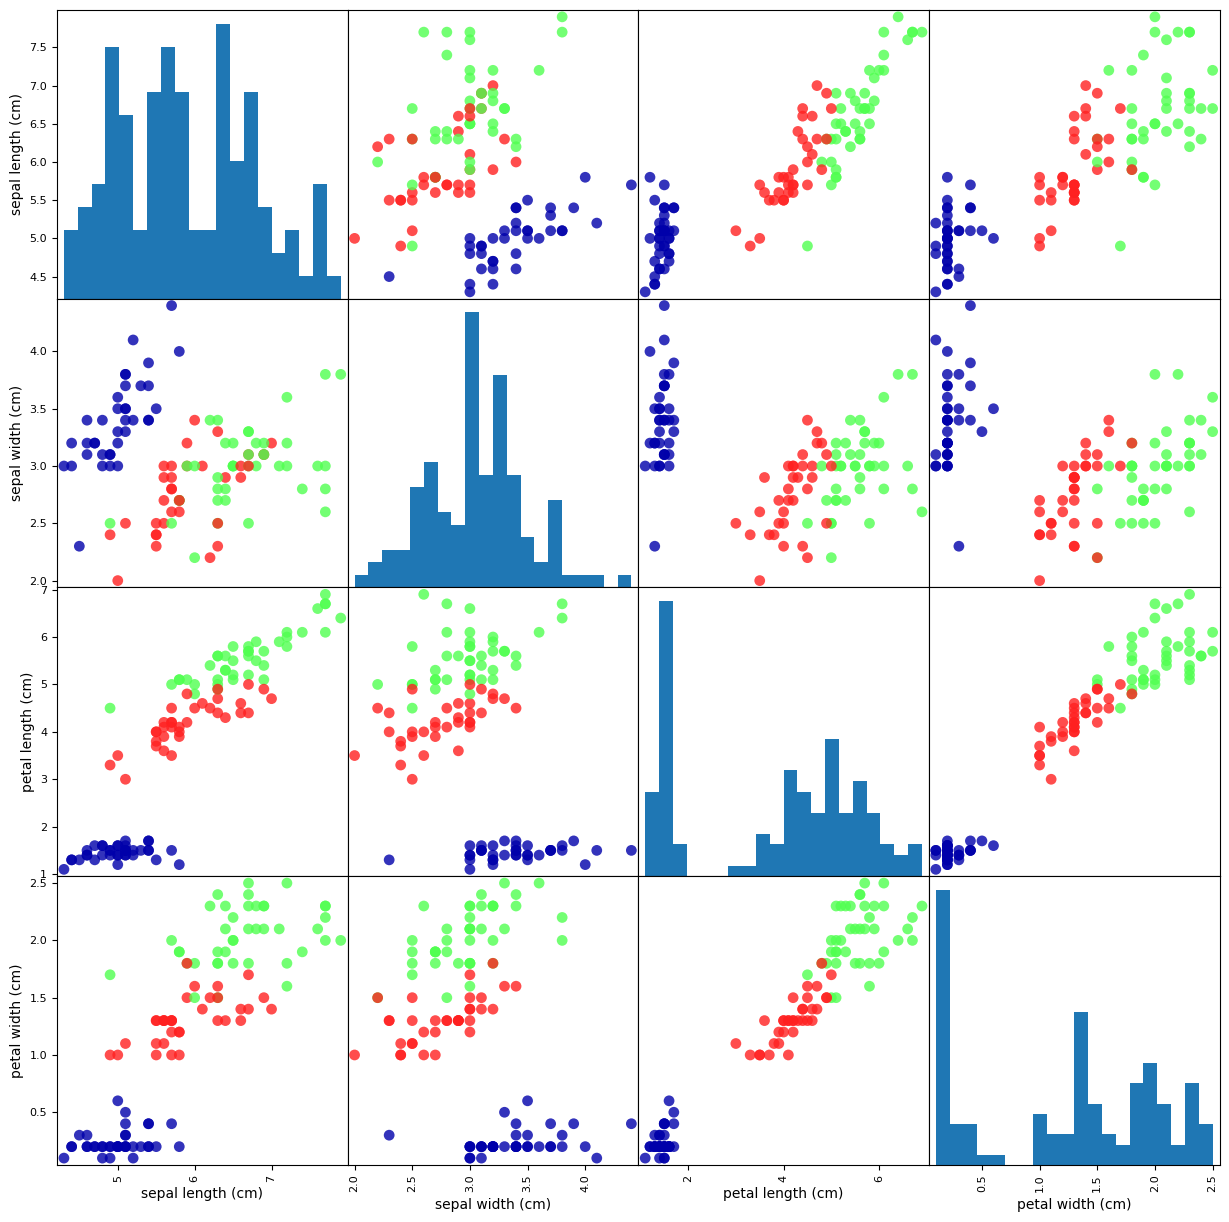

In [39]:
from pandas import plotting

# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train
grr = plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
 hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

**Gözlemler**

Grafikten, üç iris türünün, çanak yaprağı (sepal) ve taç yaprağı (petal) ölçümleri kullanılarak oldukça iyi ayrılabildiğini görüyoruz.

Bu, bir makine öğrenimi modelinin verileri ayırt etmeyi öğrenebileceğini gösteriyor.
Bu analiz sonucunda, iris verileri üzerinde başarılı bir sınıflandırma modeli geliştirebileceğimiz sonucuna varabiliriz.

**İlk Modelinizi Oluşturma: k-Nearest Neighbors, k-NN**

Şimdi ilk makine öğrenimi modelimizi oluşturmaya başlayabiliriz. Scikit-learn kütüphanesinde kullanabileceğimiz birçok sınıflandırma algoritması bulunmaktadır.

**k-NN Algoritması Nasıl Çalışır?**

 Bu algoritmada model oluşturma aşaması, sadece eğitim veri setinin saklanmasından ibarettir.
Yeni bir veri noktası için tahminde bulunmak istediğimizde, algoritma eğitim veri setindeki en yakın noktaları bulur—yani, "en yakın komşularını" tespit eder.
Yeni veri noktasına, bu en yakın komşunun etiketi atanır.

**k Değeri ve Çoğunluk (Majority class) Oylaması**

k, komşu sayısını ifade eder.

En yakın tek bir komşu yerine, belirli bir k sayısı kadar komşuyu da dikkate alabiliriz (örneğin en yakın 3 veya 5 komşu).

Daha sonra, bu komşular arasındaki çoğunluk sınıfını seçerek tahmin yapabiliriz.
Şimdilik, yalnızca 1 komşu (k = 1) kullanacağız.

**Scikit-learn’de k-NN Modelini Kullanmak**

Scikit-learn’de tüm makine öğrenimi modelleri, "Estimator" sınıfları olarak kendi özel sınıflarında uygulanır.

k-En Yakın Komşu algoritması, neighbors modülündeki KNeighborsClassifier sınıfında bulunur.

Modeli kullanabilmek için önce sınıfı bir nesne olarak başlatmamız (instantiate) gerekir.

Bu aşamada, modelin parametrelerini belirleyebiliriz.
En önemli parametre, kullanılacak komşu sayısıdır (n_neighbors).

*Şimdi, n_neighbors=1 olarak ayarlayarak modeli oluşturalım:*

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

**knn Nesnesi ve Modelin Eğitilmesi**

Oluşturduğumuz knn nesnesi, modelimizi eğitmek ve yeni veri noktaları üzerinde tahmin yapmak için gereken algoritmayı kapsülleyen bir obje olarak işlev görür.


*   Modeli oluştururken eğitim verisini kullanır.
*   Yeni veri noktaları için tahmin yaparken de eğitim setinden öğrendiği bilgileri kullanır.


**Modelin Eğitilmesi (fit Metodu)**

Modeli eğitim verileri üzerinde eğitmek için fit metodunu çağırırız.
Bu metod, iki parametre alır:

X_train → Eğitim verisi (özellikler)

y_train → Eğitim etiketleri (sınıflar)

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**Tahmin Yapmak (Making Predictions)**

Şimdi, eğittiğimiz modeli kullanarak bilinmeyen türdeki bir iris çiçeğinin hangi türe ait olduğunu tahmin edebiliriz.



Örneğin, doğada bir iris çiçeği bulduğumuzu düşünelim. Bu çiçeğin ölçümleri şu şekilde olsun:

Çanak yaprağı uzunluğu (sepal length): 5 cm

Çanak yaprağı genişliği (sepal width): 2.9 cm

Taç yaprağı uzunluğu (petal length): 1 cm

Taç yaprağı genişliği (petal width): 0.2 cm

Bu veriyi bir NumPy dizisi (numpy.ndarray) olarak saklamamız gerekiyor.

*Scikit-learn, verileri her zaman iki boyutlu (2D) bir NumPy dizisi şeklinde beklediği için, tek bir örneği bile 2D bir dizide saklamalıyız:*

In [42]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


**Model ile Tahmin Yapmak (predict Metodu)**

Scikit-learn’de, eğitilmiş bir model ile tahmin yapmak için predict metodunu kullanırız.

In [43]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
 iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


**Modelin Doğruluğuna Güvenebilir Miyiz?**

Bu noktada bir soru ortaya çıkıyor:

💡 **"Modelimize güvenebilir miyiz? Tahminin doğru olup olmadığını nasıl bilebiliriz?"**

Bu çiçeğin gerçek türünü bilmediğimiz için, modelin tahminine doğrudan güvenemeyiz.

İşte bu yüzden, modelin doğruluğunu değerlendirmek için **test verisi** kullanırız!
Eğer modelimiz test setinde iyi performans gösterirse, yeni verilerde de doğru tahminler yapma olasılığı yüksektir.

**Modeli Değerlendirmek (Evaluating the Model)**

Modelimizin ne kadar iyi çalıştığını ölçmek için önceden ayırdığımız test setini kullanabiliriz.

Test seti modelin eğitimi sırasında kullanılmadı, bu yüzden model bu verilerle daha önce hiç karşılaşmadı.
Ancak, test setindeki her iris çiçeğinin doğru türünü biliyoruz.

Bu nedenle:

*   Modeli test verileri üzerinde çalıştırabiliriz.
*   Tahmin edilen etiketleri gerçek etiketlerle karşılaştırabiliriz.
*   Modelin doğruluğunu (accuracy) hesaplayabiliriz.





*Önce, modelin test verisi için yaptığı tahminleri görelim:*

In [44]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


*Model, test setindeki her iris çiçeğinin türünü tahmin etti. Şimdi bu tahminleri gerçek etiketlerle karşılaştıralım.*


In [45]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


*Model, test setindeki iris çiçeklerinin %97'sini doğru tahmin etti!* 🎯

**score Metodu ile Doğruluk Hesaplama**

*Scikit-learn, score metodunu kullanarak doğruluk oranını hesaplamayı kolaylaştırır:*

In [46]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


**Sonuç: Modelin Başarımı**

Test seti doğruluğumuz %97, yani model test setindeki iris çiçeklerinin %97’sini doğru tahmin etti.

Matematiksel olarak, bu sonuç modelimizin yeni iris çiçeklerini %97 doğrulukla tahmin edebileceğini gösterir.

Hobi botanikçimiz için bu doğruluk oranı oldukça yüksek, yani model güvenilir bir şekilde kullanılabilir. ✅

**Son olarak**

k-NN sınıflandırıcısının (KNeighborsClassifier) iki önemli parametresi vardır:


*   Komşu sayısı (n_neighbors)
*   Veri noktaları arasındaki mesafenin nasıl ölçüldüğü

Pratikte, **üç veya beş gibi küçük bir komşu sayısı** genellikle iyi sonuçlar verir, ancak bu parametreyi mutlaka ayarlamak gerekir. Doğru mesafe ölçüsü olarak, varsayılan olarak **Öklid (Euclidean) mesafesi** kullanılır, ki bu birçok durumda iyi çalışır.

k-NN algoritmasının en büyük avantajlarından biri, **kolay anlaşılır olmasıdır.**

Genellikle çok fazla ayarlama yapmadan makul bir performans sunar.
Daha gelişmiş tekniklere geçmeden önce bir temel yöntem olarak denenmesi iyi bir fikirdir.
k-NN modelini oluşturmak genellikle **çok hızlıdır, ancak eğer eğitim seti çok büyükse (örnek sayısı veya özellik sayısı fazla olduğunda), tahmin süreci yavaş olabilir.**

Yüzlerce veya daha fazla özelliğe sahip veri kümelerinde genellikle iyi çalışmaz.
Çoğu özelliğin genellikle sıfır olduğu seyrek veri kümeleriyle (sparse datasets) özellikle kötü performans gösterir.
Sonuç olarak, k-NN algoritması kolay anlaşılır olsa da, pratikte sıkça kullanılmaz.
Bunun nedeni:

✔ Tahmin sürecinin yavaş olması

✔ Çok fazla özelliğe sahip veri kümelerini iyi işleyememesi

# Wisconsin Meme Kanseri Veri Seti

Bu veri seti, meme kanseri tümörlerinin klinik ölçümlerini içerir.
Her tümör şu şekilde etiketlenmiştir:

"Benign" (iyi huylu, zararsız tümör)

"Malignant" (kötü huylu, kanserli tümör)

Bu veri setindeki amaç, dokudan alınan ölçümlere dayanarak bir tümörün kötü huylu olup olmadığını tahmin etmeyi öğrenmektir.

*Bu veri setini yüklemek için, Scikit-learn’ün load_breast_cancer fonksiyonunu kullanabiliriz.*

In [47]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


*Bu veri seti, 569 veri noktasından oluşmaktadır ve her birinin 30 farklı özelliği vardır.*

In [48]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


Her bir özelliğin anlamını görmek için, **`feature_names`** özelliğini kullanabiliriz.
Bu, hangi klinik ölçümlerin kullanıldığını anlamamıza yardımcı olur.

In [49]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


***Model karmaşıklığı ile genelleme arasındaki bağlantıyı inceleyelim.***

  Öncelikle veri setini eğitim ve test seti olarak böleceğiz. Daha sonra, farklı komşu sayılarıyla eğitim ve test seti performansını değerlendireceğiz.

Grafikte, y ekseni eğitim ve test seti doğruluğunu, x ekseni ise n_neighbors parametresinin değerini göstermektedir. Gerçek dünya verileri genellikle çok düzgün grafikler oluşturmasa da, yine de **aşırı öğrenme (overfitting) ve yetersiz öğrenme (underfitting)** özelliklerini tanıyabiliriz.

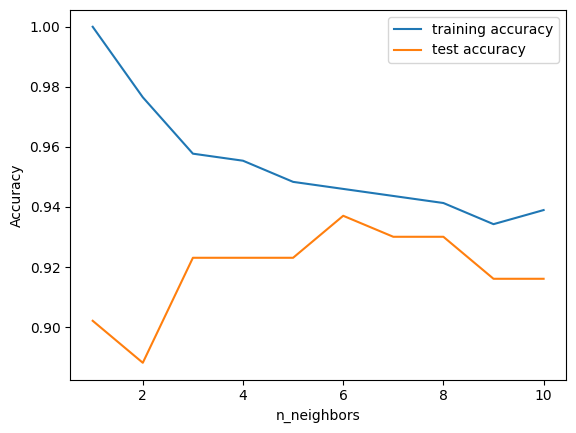

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


Eğer yalnızca bir en yakın komşu kullanılırsa, eğitim seti üzerindeki tahminler mükemmeldir. Ancak daha fazla komşu dikkate alındığında, model basitleşir ve eğitim doğruluğu düşer.

Bununla birlikte, yalnızca bir en yakın komşuyu kullanmak, test doğruluğunun daha düşük olmasına neden olur, bu da modelin fazla karmaşık olduğunu gösterir. Öte yandan, 10 komşu dikkate alındığında model çok basitleşir ve performans daha da kötüleşir.

En iyi performans yaklaşık altı komşu kullanıldığında elde edilir. Yine de grafiğin ölçeğini göz önünde bulundurmak önemlidir. En kötü performans bile yaklaşık %88 doğruluk civarındadır, bu da hala kabul edilebilir bir değer olabilir.


# **Supervised Learning Model Çeşitleri**

# **Doğrusal Modeller (Linear Models)**



Doğrusal modeller, pratikte yaygın olarak kullanılan ve son birkaç on yılda kapsamlı bir şekilde incelenmiş bir model sınıfıdır.

Bu modellerin kökeni yüz yıldan daha eskiye dayanmaktadır.

Doğrusal modeller, girdi özelliklerini (features) kullanarak doğrusal bir fonksiyon ile tahmin yapar.

**Sınıflandırma için Doğrusal Modeller (Linear Models for Classification)**

Doğrusal modeller, sınıflandırma problemlerinde de yaygın olarak kullanılır.

**En Yaygın Doğrusal Sınıflandırma Algoritmaları**

**Lojistik Regresyon (Logistic Regression)**



*   Scikit-learn'de linear_model.LogisticRegression ile uygulanır.
*   İsmi "Regresyon" olsa da, aslında bir sınıflandırma algoritmasıdır.
*   Kesinlikle LinearRegression ile karıştırılmamalıdır.


**Doğrusal Destek Vektör Makineleri (Linear SVMs)**


*   Scikit-learn'de svm.LinearSVC ile uygulanır.
*   "SVC" kelimesi "Support Vector Classifier" (Destek Vektör Sınıflandırıcısı) anlamına gelir.


Bu iki algoritma, birçok sınıflandırma probleminde hızlı, etkili ve doğrusal olarak ayırılabilen veri kümeleri için oldukça başarılıdır.

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.948
Test set score: 0.951


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
svc = LinearSVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))


Accuracy on training set: 0.97
Accuracy on test set: 0.96


**Doğrusal Modellerin Ana Parametreleri ve Düzenlileştirme (Regularization)**

Doğrusal modellerin en önemli parametresi düzenlileştirme (regularization) parametresidir:

Regresyon modellerinde bu parametre alpha olarak adlandırılır.

LinearSVC ve LogisticRegression modellerinde ise C olarak adlandırılır.

Büyük alpha veya küçük C değerleri, daha basit modeller üretir. Özellikle regresyon modellerinde bu parametrelerin doğru ayarlanması oldukça önemlidir. Genellikle C ve alpha değerleri logaritmik bir ölçek üzerinden ayarlanır.

**Doğrusal Modellerin Avantajları**

✔ Çok hızlı eğitilir ve hızlı tahmin yapar.

✔ Büyük veri kümeleriyle iyi ölçeklenir.

✔ Seyrek veri kümeleriyle (sparse data) iyi çalışır.

**Doğrusal Modeller Nerede İyi Performans Gösterir?**

✔ Özellik sayısının, örnek sayısından fazla olduğu durumlarda genellikle iyi çalışır.

✔ Çok büyük veri kümelerinde, diğer modellerin eğitilmesi pratik olmadığında tercih edilir.

❌ Ancak, daha düşük boyutlu veri kümelerinde diğer modeller daha iyi genelleme performansı sağlayabilir.

# **Naive Bayes Sınıflandırıcıları (Naive Bayes Classifiers)**



Naive Bayes sınıflandırıcıları, önceki bölümde ele aldığımız doğrusal modellere oldukça benzeyen bir sınıflandırıcı ailesidir.
Ancak, bu modeller genellikle daha hızlı eğitilir.

✔ Naive Bayes modellerinin avantajı, çok hızlı olmalarıdır.

❌ Buna karşılık, genelleme performansları genellikle LogisticRegression ve LinearSVC gibi doğrusal sınıflandırıcılardan biraz daha düşük olabilir.

**Naive Bayes Modellerinin Çalışma Prensibi**

Bu modeller, her özelliği ayrı ayrı değerlendirerek parametreleri öğrenir.
Her sınıf için, özelliklerin istatistiksel dağılımına dayalı basit hesaplamalar yapar.

**Scikit-learn’de üç farklı Naive Bayes modeli bulunmaktadır:**

**GaussianNB**

Sürekli (continuous) veriler için uygundur.

**BernoulliNB**

İkili (binary) veriler için uygundur.

Özellikle kelime var/yok bilgisi içeren metin sınıflandırmalarında kullanılır.

**MultinomialNB**

Sayım verileri (count data) için uygundur.

Özellikle metin sınıflandırmalarında (bir kelimenin kaç kez geçtiği gibi) kullanılır.

📌 BernoulliNB ve MultinomialNB en çok metin verisi sınıflandırmada kullanılır.

**Naive Bayes Algoritmasının Güçlü ve Zayıf Yönleri**

✔ Avantajlar

Çok hızlı eğitilir ve tahmin yapar.
Eğitim süreci çok basittir ve kolay anlaşılır.
Yüksek boyutlu seyrek verilerle (sparse data) çok iyi çalışır.
Parametrelere karşı nispeten dayanıklıdır (robust).
Büyük veri kümelerinde çok iyi bir başlangıç modeli olarak kullanılır.

❌ Zayıf Yönler

Diğer doğrusal sınıflandırıcılara göre genellikle daha düşük genelleme performansı sunar.
Özellikler arasında bağımsızlık varsayımı yapar, bu her zaman gerçekçi olmayabilir.

Naive Bayes modelleri, hızlı eğitilmeleri ve büyük veri kümelerinde iyi çalışmaları nedeniyle harika bir başlangıç modeli olarak kullanılabilir.

✔ Özellikle metin madenciliği ve belge sınıflandırma gibi yüksek boyutlu veri problemlerinde başarılıdırlar.

❌ Ancak, doğrusal modeller kadar genelleme performansı göstermeyebilirler ve bağımsızlık varsayımı her zaman doğru olmayabilir.

# **Decision Trees**

Karar ağaçları, **sınıflandırma ve regresyon görevleri** için yaygın olarak kullanılan modellerdir.
Temel olarak, **"Eğer/Değilse (if/else)" kurallarının hiyerarşik bir yapısını öğrenerek karar verme sürecini oluştururlar**.

Bu süreç, "20 Soruda Bil Bakalım" oyunundaki gibi düşünülebilir.

Örneğin, ayılar, şahinler, penguenler ve yunuslar gibi dört hayvanı birbirinden ayırt etmek istediğinizi düşünün.
Amacınız, mümkün olduğunca az "evet/hayır" sorusu sorarak doğru cevaba ulaşmaktır.

İlk olarak hayvanın tüyü olup olmadığını sorabilirsiniz.
Eğer cevap "evet" ise, yalnızca şahin ve penguen seçenekleri kalır.
Daha sonra "Hayvan uçabilir mi?" sorusunu sorarak, şahin ve pengueni ayırt edebilirsiniz.
Eğer cevap "hayır" ise, geriye sadece yunus ve ayı kalır.
Bu durumda, "Hayvanın yüzgeçleri var mı?" sorusunu sorarak, ayı ve yunusu ayırt edebilirsiniz.

📌 Bu şekilde karar ağaçları, veriye dayalı olarak en verimli ayırt edici soruları seçerek bir ağaç yapısı oluşturur.

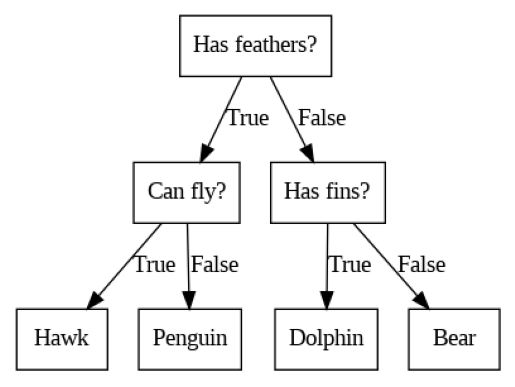

In [54]:
mglearn.plots.plot_animal_tree()

**Aşırı Öğrenmeyi Önleme Stratejileri**

Karar ağaçlarında aşırı öğrenmeyi önlemek için iki yaygın yöntem kullanılır:

1️⃣ Ağacı erken durdurmak (Pre-pruning)

Ağacın çok büyümesini baştan engeller.
Kullanılan kriterler şunlardır:


*   Maksimum derinliği sınırlandırmak (max_depth)
*   Maksimum yaprak sayısını sınırlandırmak (max_leaf_nodes)


*   Düğümleri bölmek için gereken minimum veri noktası sayısını belirlemek (min_samples_split)

2️⃣ Ağacı oluşturduktan sonra budamak (Post-pruning veya sadece pruning)

Önemsiz veya düşük bilgi içeren dalları sonradan kaldırır.

Scikit-learn yalnızca pre-pruning yöntemini uygular, post-pruning içermez.

Şimdi, Meme Kanseri veri setinde bir karar ağacı modeli oluşturarak pre-pruning’in etkisini inceleyelim.

*Öncelikle, veriyi yükleyip eğitim ve test setlerine ayıracağız. Daha sonra standart ayarlarla bir model oluşturacağız ve ağacın tamamen büyümesine izin vereceğiz.*

*Ayrıca, random_state parametresini sabitleyerek aynı sonuçları almayı garantileyeceğiz.*

In [55]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Beklendiği gibi, eğitim setindeki doğruluk oranı %100’dür—çünkü tüm yapraklar saf hale gelmiştir.

Ağaç yeterince derin büyütüldüğünden, **eğitim verisindeki tüm etiketleri mükemmel şekilde ezberleyebilir.**

Ancak, **test seti doğruluğu biraz daha düşüktür** ve önceki bölümlerde incelediğimiz doğrusal modellere göre biraz daha kötü performans gösterir.
Önceki doğrusal modeller yaklaşık %95 doğruluk elde ederken, karar ağacı daha düşük bir test doğruluğuna sahiptir.

In [56]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


**Pre-Pruning ile Aşırı Öğrenmeyi Önleme**

Eğer bir karar ağacının derinliğini sınırlamazsak, ağaç gereğinden fazla karmaşık hale gelebilir.

**Budanmamış (unpruned) ağaçlar genellikle aşırı öğrenmeye (overfitting) eğilimlidir ve yeni verilere iyi genelleme yapamazlar.**

Şimdi, pre-pruning uygulayarak ağacın aşırı büyümesini engelleyelim.
Bunu yapmak için, ağacın belirli bir derinliğe ulaştığında büyümeyi durdurmasını sağlayacağız.

Burada **max_depth=4** olarak ayarlayacağız, yani ağaç en fazla dört ardışık karar sorusu oluşturabilir.

📌 **Ağaç derinliğini sınırlandırmak, aşırı öğrenmeyi azaltır.**

Bu, eğitim seti doğruluğunu düşürse de,
Test seti doğruluğunu artırabilir ve modelin genelleme performansını iyileştirebilir.


**Karar Ağaçlarının Görselleştirilmesi**

[plot_tree fonksiyonu](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree)

export_graphviz function from the tree module.

In [57]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)

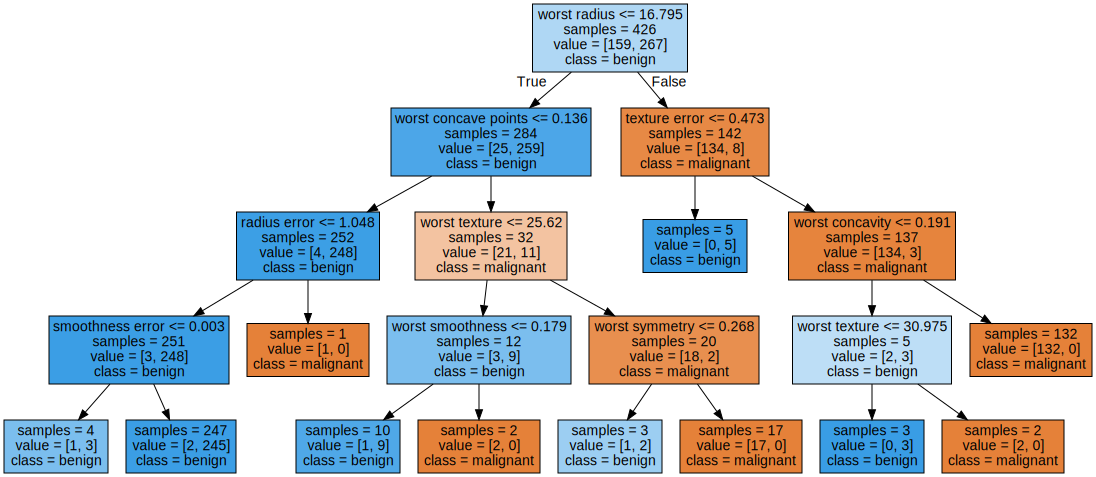

In [58]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

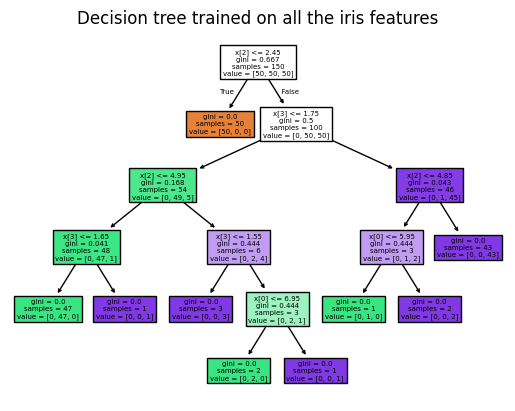

In [59]:
from sklearn.tree import plot_tree
iris = load_iris()
plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

**Karar Ağaçlarında Özellik Önem Derecesi (Feature Importance in Trees)**

Bütün ağacı incelemek zaman alıcı ve zor olabilir. Bunun yerine, karar ağacının nasıl çalıştığını özetleyen bazı faydalı özellikler bulunmaktadır.

Bunlardan en yaygın kullanılanı **"özellik önemi" (feature importance)** değeridir.

✔ **Özellik önemi, her bir özelliğin ağacın karar vermesinde ne kadar önemli olduğunu derecelendirir.**

✔ Bu değer** 0 ile 1 arasında** bir sayı olarak gösterilir:

0 → Özellik hiç kullanılmamış
1 → Özellik hedef değişkeni mükemmel bir şekilde tahmin ediyor

✔ Tüm özelliklerin önem derecelerinin **toplamı her zaman 1'e eşittir.**

In [60]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


**Özellik Önem Derecelerini Görselleştirme (Visualizing Feature Importances)**

*Karar ağacında özellik önem derecelerini, doğrusal modellerde katsayıları (coefficients) görselleştirdiğimiz gibi görselleştirebiliriz.*

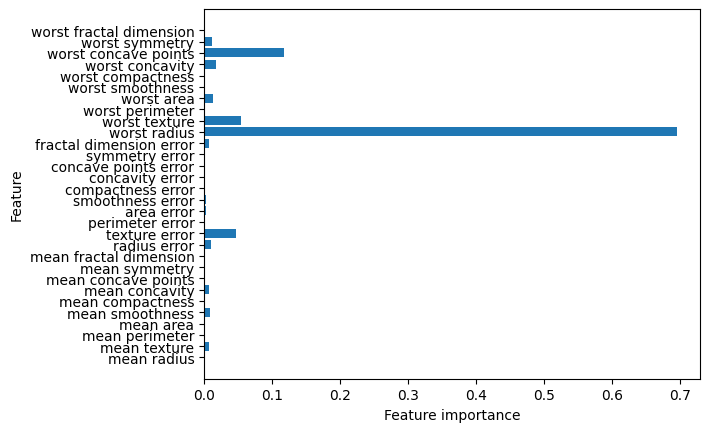

In [61]:
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

📌 Özellik önem sıralamasına bakarak, hangi değişkenlerin modelde daha etkili olduğunu görebiliriz.

Örneğin, ağacın en üst seviyesindeki (ilk bölünme yapılan) özellik "worst radius" (en kötü yarıçap), en önemli özellik olarak belirlenmiştir.

Bu, ağacın ilk seviyesinin zaten iki sınıfı oldukça iyi ayırabildiğini doğrular.
**Ancak, bir özelliğin düşük "feature_importance" değerine sahip olması, onun tamamen önemsiz olduğu anlamına gelmez.**

Bu özellik, başka bir özelliğin içerdiği bilgiyi temsil ettiği için seçilmemiş olabilir.
Örneğin, "worst radius" ve "mean radius" benzer bilgiyi içeriyorsa, model yalnızca birini seçebilir.

***Karar ağaçlarındaki model karmaşıklığını kontrol eden parametreler pre-pruning parametreleridir.***

Bu parametreler, ağacın tamamen büyümeden önce durmasını sağlar.
Aşırı öğrenmeyi (overfitting) önlemek için genellikle şu üç parametreden biri ayarlanır:

**max_depth** → Ağacın maksimum derinliğini sınırlar.

**max_leaf_nodes** → Maksimum yaprak düğümü sayısını sınırlar.

**min_samples_leaf** → Bir yaprak düğümünde bulunması gereken minimum veri sayısını belirler.

Genellikle bu üç parametreden birini ayarlamak, aşırı öğrenmeyi önlemek için yeterlidir.

**Karar Ağaçlarının Avantajları (Advantages)**

✔ Kolay Görselleştirme ve Yorumlama:

Küçük karar ağaçları, uzman olmayan kişiler tarafından bile anlaşılabilir ve yorumlanabilir.
Ağaç yapısı şemalar halinde görselleştirilebilir.

✔ Özellik Ölçeklendirmeye Duyarsızdır:

Her özellik ayrı ayrı işlendiği için, veri ölçeklendirme (normalizasyon veya standardizasyon) gerekmez.
Özelliklerin farklı ölçeklerde olması veya hem ikili (binary) hem de sürekli (continuous) olması karar ağacını etkilemez.

✔ Karar Ağaçları Karmaşık Veri Yapılarını Yönetebilir:

Dallara ayrılarak farklı kuralları öğrenebilir.
Bağımsız ve bağımlı değişkenler arasındaki ilişkileri keşfetmek için faydalıdır.

**Karar Ağaçlarının Dezavantajları (Disadvantages)**

❌ Aşırı Öğrenmeye Eğilimlidir (Overfitting):

Pre-pruning bile bazen aşırı öğrenmeyi tamamen önleyemez.
Ağaçlar, eğitim verisine çok fazla uyum sağlayarak test verisinde kötü genelleme yapabilir.

❌ Tek Bir Karar Ağacı Genellikle Yetersizdir:

Gerçek dünya uygulamalarında, tek bir karar ağacı yerine genellikle topluluk (ensemble) yöntemleri tercih edilir.
Örneğin, Rastgele Orman (Random Forest) ve Gradient Boosting gibi yöntemler daha iyi genelleme sağlar.


**Karar ağaçları, hızlı ve yorumlanabilir modeller olmaları nedeniyle faydalıdır. Ancak, aşırı öğrenmeye karşı hassas olmaları nedeniyle genellikle tek başlarına kullanılmazlar.**

**Karar Ağaçlarının Topluluk Modelleri (Ensembles of Decision Trees)**

Topluluk yöntemleri (Ensemble Methods), birden fazla makine öğrenmesi modelini birleştirerek daha güçlü modeller oluşturan tekniklerdir.

📌 Bu yöntemler, tek bir model yerine birçok modeli bir araya getirerek genellikle daha iyi genelleme performansı sunar.


Makine öğrenmesi literatüründe bu kategoriye giren birçok model bulunmaktadır. Ancak,

📌 Karar ağaçlarını temel alan ve çok çeşitli veri kümelerinde etkili olduğu kanıtlanmış iki önemli topluluk modeli vardır:

1️⃣ Rastgele Ormanlar (Random Forests)

2️⃣ Gradient Boosting Karar Ağaçları (Gradient Boosted Decision Trees, GBM, XGBoost gibi)

📌 **Rastgele Ormanlar (Random Forests)**

Önceki bölümlerde, karar ağaçlarının en büyük zayıflıklarından birinin aşırı öğrenmeye (overfitting) eğilimli olması olduğunu gördük.

📌 Rastgele ormanlar (Random Forests), bu sorunu çözmek için geliştirilmiş bir yöntemdir.

Rastgele Ormanlar Nasıl Çalışır?

✔ Rastgele orman, tek bir karar ağacı yerine birden fazla karar ağacının birleşimidir.

✔ Her ağaç biraz farklıdır, ancak yine de tahmin yapma yeteneğine sahiptir.

✔ Fikir şudur:

Tek tek karar ağaçları, verinin bir kısmını iyi tahmin edebilir, ancak aşırı öğrenebilir.

Farklı şekillerde eğitilmiş birçok karar ağacı oluşturup tahminlerini birleştirirsek, aşırı öğrenmeyi azaltabiliriz.
Matematiksel olarak kanıtlanmıştır ki:

📌 Bu süreç, aşırı öğrenmeyi azaltırken tahmin gücünü korur!

📌 **Rastgele Ormanlar Neden "Rastgele"?**

Bir rastgele ormanda her bir ağacın farklı olması gerekir.
Bunu sağlamak için iki temel rastgelelik eklenir:

1️⃣ Ağaç oluşturulurken kullanılan veri noktaları rastgele seçilir

Her ağacın eğitiminde farklı veri alt kümeleri kullanılır.
Bu yönteme "Bootstrap Aggregation" veya kısaca "Bagging" denir.

2️⃣ Her bölünmede (split), rastgele seçilen bir özellik kümesi arasından seçim yapılır.
Standart karar ağaçları tüm özellikleri kullanırken, rastgele ormanlar her düğümde rastgele bir özellik alt kümesi seçer.
Bu, ağaçların birbirinden daha bağımsız olmasını sağlar ve modelin daha dengeli olmasına yardımcı olur.

📌 Rastgele Ormanların Faydaları

✔ Aşırı öğrenmeyi azaltır ve daha iyi genelleme yapar.

✔ Tek bir karar ağacına göre daha güçlü tahminler üretir.

✔ Özellik ölçeklendirmeye duyarsızdır, yani normalizasyon veya standardizasyon gerektirmez.

✔ Eksik verilere ve gürültülü verilere karşı dayanıklıdır.



In [62]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972


📌 **Rastgele Ormanların Performansı**

✔ Rastgele orman modeli, %97 doğruluk oranı sağlayarak doğrusal modellerden ve tek bir karar ağacından daha iyi performans göstermiştir.

✔ Üstelik, hiçbir parametre ayarı yapılmadan, varsayılan değerlerle bu başarı elde edilmiştir.

Elbette, max_features gibi hiperparametreler ayarlanarak veya pre-pruning uygulanarak modelin performansı optimize edilebilir.
Ancak çoğu zaman, rastgele ormanın varsayılan ayarları bile oldukça iyi çalışır.

**Rastgele Ormanlarda Özellik Önem Dereceleri (Feature Importance)**

Tıpkı tek bir karar ağacında olduğu gibi, rastgele ormanlar da özellik önem derecelerini sağlar.

✔ Ancak, rastgele ormanda özellik önem dereceleri, tüm ağaçlardan gelen önem değerlerinin birleştirilmesiyle hesaplanır.

✔ Bu nedenle, rastgele ormanın sağladığı özellik önem değerleri, tek bir karar ağacının sağladıklarından daha güvenilir olma eğilimindedir.

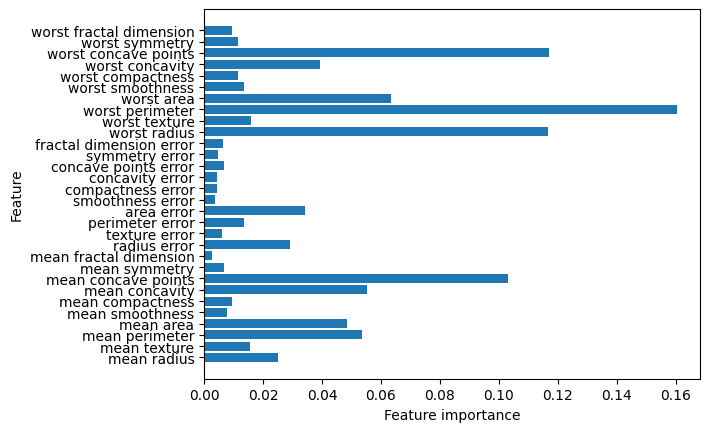

In [63]:
plot_feature_importances_cancer(forest)

Rastgele ormanlar (random forests), günümüzde hem sınıflandırma hem de regresyon için en yaygın kullanılan makine öğrenmesi yöntemlerinden biridir.

✔ Oldukça güçlüdürler ve çoğu zaman ağır hiperparametre ayarlarına ihtiyaç duymadan iyi çalışırlar.

✔ Veri ölçeklendirmesi (normalizasyon veya standardizasyon) gerektirmezler.

📌 **Rastgele Ormanların Avantajları**

✔ Karar ağaçlarının tüm avantajlarına sahiptir, ancak bazı zayıflıklarını giderir.

✔ Aşırı öğrenmeye (overfitting) daha az eğilimlidir.

✔ Özellikle büyük veri kümelerinde iyi çalışır.

✔ Paralel işlemeye uygundur, yani çoklu işlemci çekirdekleri (multi-core CPU) kullanılarak hızlandırılabilir.


📌 **Rastgele Ormanların Paralel İşleme Yeteneği**

Büyük veri kümelerinde, rastgele ormanların eğitimi zaman alabilir.
Ancak, her bir karar ağacı bağımsız olarak oluşturulduğu için, çok çekirdekli işlemcilerde paralel olarak çalıştırılabilir.
Scikit-learn’de n_jobs parametresi, kullanılacak işlemci çekirdeklerinin sayısını belirler.
n_jobs=-1 → Tüm işlemci çekirdeklerini kullanır (en hızlı performans için önerilir).
Örneğin, iki çekirdek kullanılırsa, modelin eğitimi yaklaşık iki kat hızlanır.
Ancak, n_jobs değeri bilgisayarın çekirdek sayısından büyük olursa, ek bir hızlanma sağlanmaz.

📌 **Rastgelelik ve random_state**

Rastgele ormanlar doğası gereği rastgelelik içerir.
Eğer random_state belirlenmezse veya farklı random_state değerleri kullanılırsa, her çalıştırmada farklı modeller elde edilebilir.
Ancak, modeldeki ağaç sayısı (n_estimators) arttıkça, random_state seçiminin etkisi azalır ve model daha kararlı hale gelir.
Tekrar üretilebilir (reproducible) sonuçlar almak için random_state sabitlenmelidir.

📌 **Rastgele Ormanlarda Ayarlanması Gereken Ana Parametreler**

1️⃣ **n_estimators** (Ağaç Sayısı)

Ne kadar fazla ağaç olursa, genellikle modelin aşırı öğrenme riski azalır ve genelleme performansı artar.
Ancak, çok fazla ağaç daha fazla bellek kullanır ve eğitim süresini uzatır.
Genellikle “bilgisayarınızın zamanı ve belleği yettiği kadar çok” ağaç kullanılır.

2️⃣ **max_features** (Özellik Alt Kümesi Boyutu)

Her ağacın öğrenme sürecinde kullanacağı özelliklerin sayısını belirler.
Bu rastgelelik, ağaçların birbirinden farklı olmasını sağlar ve genelleme gücünü artırır.
Varsayılan değerler:

Sınıflandırma için max_features = sqrt(n_features) (özellik sayısının karekökü)

Regresyon için max_features = log2(n_features) (özellik sayısının log taban 2 değeri)

Küçük max_features aşırı öğrenmeyi azaltabilir, ancak çok küçük değerler modelin gücünü düşürebilir.

3️⃣ **Pre-Pruning Parametreleri** (max_depth, max_leaf_nodes)

Ağacın büyümesini sınırlayarak aşırı öğrenmeyi önleyebilir.
Daha küçük max_depth veya max_leaf_nodes, daha basit ve hızlı bir model sağlar.
Özellikle çok büyük veri kümelerinde bu parametrelerin ayarlanması faydalı olabilir.

📌 **Sonuç**

✔ Rastgele ormanlar, karar ağaçlarının aşırı öğrenme eğilimini azaltan güçlü topluluk yöntemleridir.

✔ Varsayılan ayarlarla bile iyi çalışır, ancak bazı hiperparametreler ayarlandığında daha da güçlü hale getirilebilir.

✔ Çoklu işlemci çekirdeklerini kullanarak eğitim süresi hızlandırılabilir (n_jobs=-1).

✔ Ancak, bellek kullanımı ve eğitim süresi doğrusal modellere kıyasla daha fazladır.

**Gradient Boosted Decision Trees (GBDT)**

📌 Gradient Boosting Karar Ağaçları (GBDT), birden fazla karar ağacını birleştirerek güçlü bir model oluşturan başka bir topluluk yöntemidir.

✔ İsminde "regression" kelimesi geçmesine rağmen, bu yöntem hem regresyon hem de sınıflandırma için kullanılabilir.

✔ Rastgele ormandan farklı olarak, gradient boosting ağaçları "seri (ardışık) şekilde" inşa edilir.

✔ Her yeni ağaç, bir önceki ağacın hatalarını düzeltmeye çalışır.

📌 Rastgele Orman (Random Forest) vs. Gradient Boosting

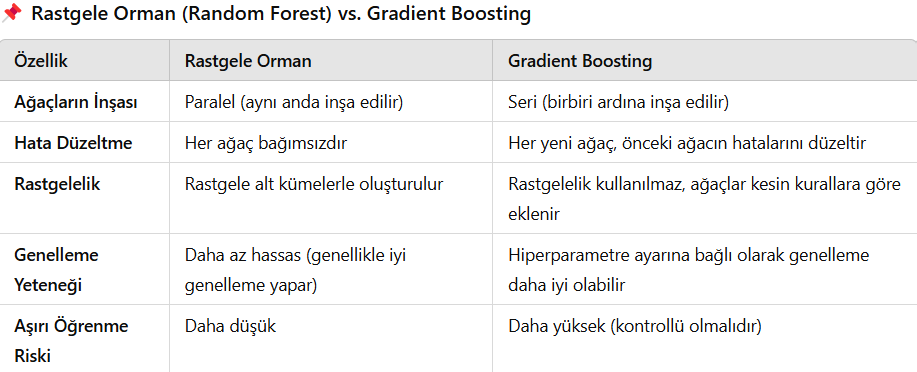


📌 **Gradient Boosting Nasıl Çalışır?**

1️⃣ İlk olarak, çok basit bir model (genellikle tek bir karar ağacı) oluşturulur.

2️⃣ Ardından, modelin yaptığı hatalara bakılır ve hataları düzeltecek yeni bir ağaç eklenir.

3️⃣ Bu süreç, her yeni ağacın önceki modelin hatalarını azaltmaya çalıştığı bir döngü şeklinde devam eder.

4️⃣ Model belirlenen ağaç sayısına (n_estimators) ulaştığında eğitim tamamlanır.

📌 Bu yöntemde, her yeni ağaç modeli daha iyi hale getirir, ancak aşırı öğrenmeye de neden olabilir.

📌 Gradient Boosting'in Önemli Parametreleri

1️⃣ **n_estimators** (Ağaç Sayısı)

Kaç tane ağaç ekleneceğini belirler.
Daha fazla ağaç genellikle daha güçlü bir model oluşturur, ancak aşırı öğrenme riskini artırabilir.

2️⃣ **learning_rate** (Öğrenme Oranı)

Her yeni ağacın önceki modelin hatalarını ne kadar güçlü düzelteceğini belirler.
Yüksek bir learning_rate, modeli daha karmaşık hale getirebilir.
Daha düşük learning_rate, daha fazla ağaca ihtiyaç duyar ama genellikle daha iyi genelleme sağlar.

📌 **Genel kural:**

Eğer learning_rate yüksekse, n_estimators düşük olmalıdır.

Eğer learning_rate düşükse, daha fazla n_estimators kullanılmalıdır.

🚨 **Gradient Boosting’de Aşırı Öğrenmeyi Kontrol Etmek İçin:**

✔ max_depth veya max_leaf_nodes kullanarak aşırı büyümeyi sınırlandırın.

✔ subsample kullanarak eğitim verisinin bir kısmıyla eğitim yapın.

✔ learning_rate değerini düşürerek daha az agresif öğrenme sağlayın.




In [64]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.965


*Eğitim setindeki doğruluk oranı %100 olduğunda, model büyük ihtimalle aşırı öğrenmeye (overfitting) uğramıştır.*

Aşırı öğrenmeyi azaltmak için iki temel yöntem uygulanabilir:

1️⃣ Ağaçların maksimum derinliğini sınırlayarak (daha güçlü pre-pruning uygulayarak)

2️⃣ Öğrenme oranını (learning rate) düşürerek

📌 Bu yöntemlerin her ikisi de modelin karmaşıklığını azaltarak genelleme performansını iyileştirebilir.

In [65]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [66]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958



✔ Gradient Boosting, gözetimli öğrenme için en güçlü ve en yaygın kullanılan modellerden biridir.

✔ Özellikle büyük veri kümelerinde yüksek doğruluk sağlar ve birçok endüstride kullanılır.

🚨 Ancak, bazı dezavantajları vardır:

❌ Parametre ayarlarının dikkatli yapılması gerekir, aksi halde aşırı öğrenme (overfitting) yaşanabilir.

❌ Eğitim süresi uzun olabilir, özellikle büyük veri kümelerinde daha fazla işlem gücü gerektirir.

❌ Diğer ağaç tabanlı modeller gibi, yüksek boyutlu seyrek verilerde (örneğin metin verisi) iyi çalışmaz.

📌 Ancak, rastgele ormanlar (Random Forests) gibi diğer ağaç tabanlı modellerde olduğu gibi:

Özellik ölçeklendirmesi gerektirmez.
İkili (binary) ve sürekli (continuous) özelliklerden oluşan veri kümelerinde iyi çalışır.

📌 **Gradient Boosting Modelinde Ayarlanması Gereken Ana Parametreler**

 1️⃣ **n_estimators** (Ağaç Sayısı)

Kaç tane karar ağacı oluşturulacağını belirler.
Daha fazla ağaç genellikle daha güçlü bir model oluşturur, ancak aşırı öğrenme riskini artırabilir.
Rastgele ormanlardan farklı olarak, n_estimators değeri artırıldığında her zaman daha iyi sonuç vermez.
Aşırı öğrenmeyi önlemek için learning_rate ile dengelenmelidir.

 2️⃣ **learning_rate** (Öğrenme Oranı)

Her ağacın önceki modelin hatalarını ne kadar agresif düzelteceğini belirler.
Daha düşük learning_rate, daha fazla n_estimators gerektirir ancak genellikle daha iyi genelleme yapar.
Yüksek learning_rate, modeli daha karmaşık hale getirerek aşırı öğrenmeye neden olabilir.

 3️⃣ **max_depth** (Maksimum Ağaç Derinliği) veya max_leaf_nodes (Maksimum Yaprak Düğüm Sayısı)

Her bir karar ağacının ne kadar büyümesine izin verileceğini belirler.
Gradient Boosting modellerinde genellikle max_depth çok düşük tutulur (çoğu zaman 5'ten büyük olmamalıdır).
Daha küçük ağaçlar kullanılarak aşırı öğrenme önlenebilir ve model daha hızlı eğitilebilir.

# **Evaluation & Hyperparameter Tuning**




Bu bölümde, makine öğrenmesi **modellerini değerlendirme (model evaluation)** ve **hiperparametre ayarlama (hyperparameter tuning)** kavramlarını inceleyeceğiz.
Bu konular, modellerin performansını ölçmek ve iyileştirmek için kritik öneme sahiptir.



✔ Model performansını analiz edebilecek

✔ Daha iyi sonuçlar almak için modelleri optimize etmek

için kullanılırlar.

**Neden Model Değerlendirmesi Yapmalıyız?**

Bir modeli eğittikten sonra, performansını değerlendirmek çok önemlidir.

📌 Bu, modelin yalnızca eğitim verisine uyup uymadığını değil, aynı zamanda yeni verilere nasıl genelleme yaptığını anlamamıza yardımcı olur.

Bu bölümde aşağıdaki değerlendirme tekniklerini ele alacağız:

1️⃣ Karışıklık Matrisi (Confusion Matrix)

2️⃣ Doğruluk (Accuracy), Kesinlik (Precision), Duyarlılık (Recall) ve F1-Skoru

3️⃣ Çapraz Doğrulama (Cross-Validation)

4️⃣ ROC Eğrisi ve AUC (Receiver Operating Characteristic & Area Under Curve)



📌 **1. Karışıklık Matrisi (Confusion Matrix)**

Confusion Matrix, sınıflandırma modellerinin performansını analiz etmek için kullanılan bir araçtır.

✔ Gerçek etiketlerle modelin tahminlerini karşılaştırarak detaylı bir performans analizi sunar.

✔ Hangi sınıfların doğru veya yanlış tahmin edildiğini görmek için kullanılır.

📌 Matrisin ana bileşenleri şunlardır:

✔ Gerçek Pozitifler (**TP - True Positives**): Doğru tahmin edilen pozitif örnekler.

✔ Gerçek Negatifler (**TN - True Negatives**): Doğru tahmin edilen negatif örnekler.

✔ Yanlış Pozitifler (**FP - False Positives**): Pozitif olarak tahmin edilen ancak gerçekte negatif olan örnekler (Tip I hatası).

✔ Yanlış Negatifler (**FN - False Negatives**): Negatif olarak tahmin edilen ancak gerçekte pozitif olan örnekler (Tip II hatası).

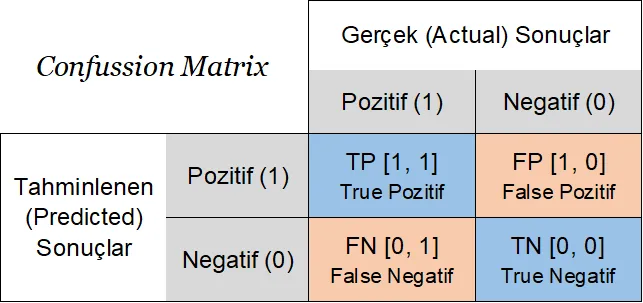

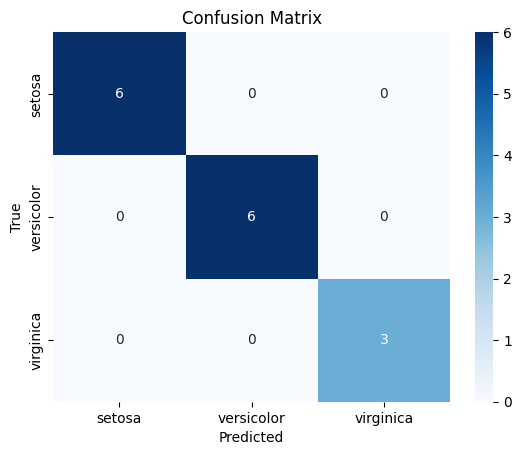

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load dataset
#data = load_breast_cancer()
data = load_iris()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train RandomForest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Confusion matrix, modelin farklı sınıflarda nasıl performans gösterdiğine dair ayrıntılı bir görünüm sunarak, **belirli sınıfları sürekli olarak yanlış sınıflandırmak gibi** zorlandığı alanları belirlemeye yardımcı olur.


Bu, **modeli ayarlama, daha fazla eğitim verisi ekleme veya sınıf dengesizliğini** **(class imbalance)** ele alma gibi daha fazla iyileştirmeye rehberlik edebilir.


📌 **2. Doğruluk (Accuracy), Kesinlik (Precision), Duyarlılık (Recall) ve F1-Skoru**

✔ Bu metrikler, modelin başarısını daha kapsamlı bir şekilde değerlendirmemizi sağlar.



**Doğruluk (Accuracy):** Modelin ne sıklıkla doğru tahminde bulunduğunu gösterir. **->** Doğruluk, modelin ne sıklıkla doğru olduğuna dair genel bir fikir verir, ancak veri kümesi dengesizse yanıltıcı olabilir.

**Kesinlik (Precision):** Pozitif olarak tahmin edilen değerlerin gerçekte ne kadar doğru olduğunu ölçer. **->** Precision is useful when the cost of false positives is high

**Duyarlılık (Recall - Sensitivity):** Gerçek pozitiflerin ne kadarının doğru tahmin edildiğini gösterir. **->** Recall is important when the cost of false negatives is high

**F1-Skoru:** Kesinlik ve duyarlılık arasında denge kuran bir metriktir. **->** F1 score, özellikle doğruluğun model performansını yansıtmaya yetmeyebileceği dengesiz veri kümelerinde, hassasiyet ve geri çağırma arasında bir dengeye ihtiyaç duyduğunuzda faydalıdır.

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-Score: 0.96


Sınıfların dengesiz olduğu durumlarda doğruluk (accuracy) iyi bir değerlendirme metriği olmayabilir çünkü yanıltıcı sonuçlar verebilir. İşte nedenleri:

1. Çoğunluk Sınıfının Baskın Olması
Dengesiz bir veri kümesinde çoğunluk sınıfının örnekleri çok fazladır. Eğer model, sadece çoğunluk sınıfını tahmin ederse bile yüksek doğruluk elde edebilir.
Örnek: **Eğer veri kümesinde %95 A sınıfı ve %5 B sınıfı varsa, model her zaman A sınıfını tahmin ederse doğruluk %95 olur. Ancak model, B sınıfını hiç tahmin etmediği için aslında işe yaramaz.**
2. Azınlık Sınıfındaki Kötü Performans
Gerçek dünyadaki birçok problemde azınlık sınıfını doğru tahmin etmek çok daha kritiktir.
Örneğin: **Kanser teşhisi yapan bir model, kanser vakalarının %5 olduğu bir veri kümesinde her zaman "sağlıklı" derse %95 doğruluk elde eder. Ancak model, kanser hastalarını kaçırıyorsa (false negative), yüksek doğruluk değeri anlamsız olur.**
3. Yanıltıcı Yorumlama
Doğruluk (accuracy), **false positive (yanlış pozitif) ve false negative (yanlış negatif) farkını dikkate almaz.**

1. Ne Zaman Precision Kullanılmalı?

 Precision = TP / (TP + FP)

Modelin pozitif olarak tahmin ettiği örneklerin gerçekten pozitif olup olmadığını ölçer.
False Positive'lerin (Yanlış Pozitifler) pahalı olduğu durumlarda kullanılır.

✅ Precision Kullanılması Gereken Durumlar:

Spam Tespiti: Eğer model önemli bir e-postayı yanlışlıkla spam olarak etiketlerse (false positive), kullanıcı o e-postayı kaçırabilir. Yüksek precision, gerçekten spam olan e-postaların işaretlenmesini sağlar.

Tıbbi Tedavi Önerileri: Eğer model bir hastanın ciddi bir hastalığı olduğunu yanlış tahmin ederse (false positive), hasta gereksiz ve maliyetli bir tedaviye maruz kalabilir.

2. Ne Zaman Recall Kullanılmalı?

 Recall = TP / (TP + FN)

Gerçek pozitif vakaların kaç tanesinin doğru tahmin edildiğini ölçer.
False Negative'lerin (Yanlış Negatifler) pahalı olduğu durumlarda kullanılır.

✅ Recall Kullanılması Gereken Durumlar:

Kanser Tespiti: Eğer model bir kanser hastasını sağlıklı olarak tahmin ederse (false negative), teşhis gecikebilir ve hastanın hayatı tehlikeye girebilir.

Dolandırıcılık Tespiti: Bir sahtekarlık vakasını atlamak (false negative), bankaya veya müşteriye büyük maliyetlere yol açabilir. Bu yüzden, sahtekarlık olasılığı olan tüm vakaları yakalamak daha önemlidir.

3. Ne Zaman F1-score Kullanılmalı?

 F1-score = 2 * (Precision * Recall) / (Precision + Recall)

Precision ve Recall arasındaki dengeyi sağlar.
Hem yanlış pozitiflerin hem de yanlış negatiflerin önemli olduğu durumlarda kullanılır.

✅ F1-score Kullanılması Gereken Durumlar:

Chatbot Niyet Sınıflandırması: Bir chatbot, kullanıcının niyetini yanlış tahmin ederse (false positive veya false negative), kullanıcı deneyimi olumsuz etkilenir. Precision ve recall’ün dengeli olması, chatbot’un daha doğru çalışmasını sağlar.

Müşteri Kaybı (Churn) Tahmini: Eğer bir model, bir müşterinin firmayı terk edeceğini yanlış tahmin ederse (false positive), gereksiz promosyon teklifleri sunulabilir. Eğer modeli kaçırırsa (false negative), müşteri kaybedilebilir. Bu nedenle, denge sağlamak için F1-score kullanılır.


📌 **3. Çapraz Doğrulama (Cross-Validation)**

Cross-Validation, veri kümesini birden fazla alt kümeye veya "**folds**" bölerek bir modelin performansını değerlendirmek için kullanılan güçlü bir tekniktir.
Model, verilerin bir alt kümesi üzerinde eğitilir ve kalan veriler üzerinde test edilir. Bu işlem, her katlama bir kez test kümesi görevi görecek şekilde birden fazla kez tekrarlanır.

 Bu, aşırı uyum riskini azaltır ve modelin görülmemiş verilere nasıl genelleştirileceğine dair daha güvenilir bir tahmin sağlar.

 Cross-Validationın en yaygın biçimlerinden biri, verilerin K alt kümeye bölündüğü K-Katlı Çapraz Doğrulamadır.

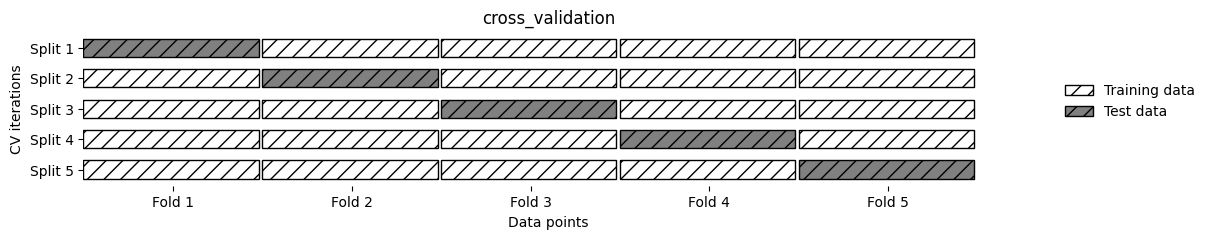

In [81]:
mglearn.plots.plot_cross_validation()

In [75]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

Cross-validation scores: [0.93859649 0.94736842 0.98245614 0.97368421 0.99115044]
Mean cross-validation score: 0.97


Cross Validation, modeli verilerin birden fazla alt kümesinde test ederek sağlam bir değerlendirme sağlar ve belirli bir alt kümeye aşırı uyum (**overfitting**) sağlamadığından emin olur. Çapraz doğrulamadan elde edilen ortalama puan, modelin performansının farklı veri bölmeleri arasında daha doğru bir yansımasını verir ve katlamalar arasındaki varyansı inceleyerek modelin performansının ne kadar kararlı ve tutarlı olduğu değerlendirilebilir.

📌 **4. ROC Eğrisi ve AUC**

The Receiver Operating Characteristic (ROC) eğrisi, ikili sınıflandırma modellerinin performansını değerlendirmek için kullanılan grafiksel bir gösterimdir.

 Çeşitli eşik değerleri için Gerçek Pozitif Oranını(TPR- True Positive Rate) Yanlış Pozitif Oranına (FPR- False Positive Rate) karşı çizer.

 **Sensitivity veya recall** olarak da bilinen Gerçek Pozitif Oranı, model tarafından doğru bir şekilde tanımlanan gerçek pozitif vakaların oranıdır.

 Yanlış Pozitif Oranı, yanlış bir şekilde pozitif olarak tanımlanan gerçek negatif vakaların oranıdır.

 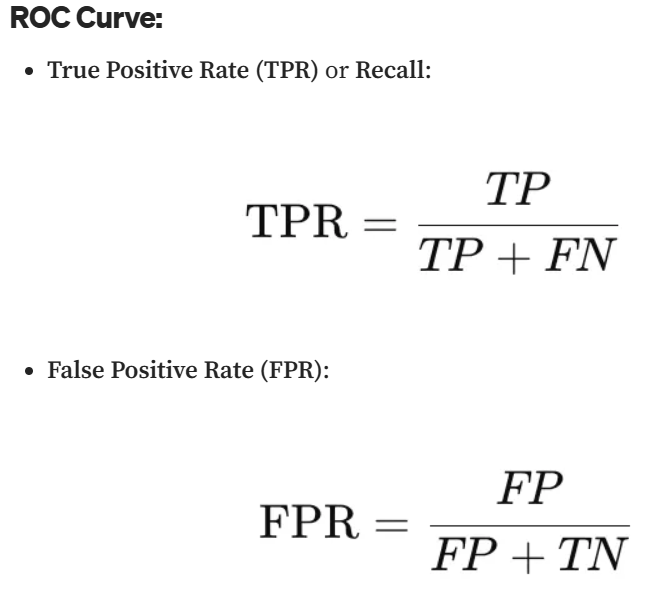

**Area Under the Curve (AUC):**

AUC, ROC eğrisinin altındaki alanı temsil eder ve modelin pozitif ve negatif sınıflar arasında ayrım yapma yeteneğini özetleyen tek bir skaler değer sağlar.

**AUC değeri 0 ile 1 arasında değişir:**

AUC = 1: Model sınıflar arasında mükemmel bir ayrım yapar.

AUC = 0,5: Model rastgele tahminden daha iyi performans göstermez.

AUC < 0,5: Model rastgele tahminden daha kötüdür (yani terstir).


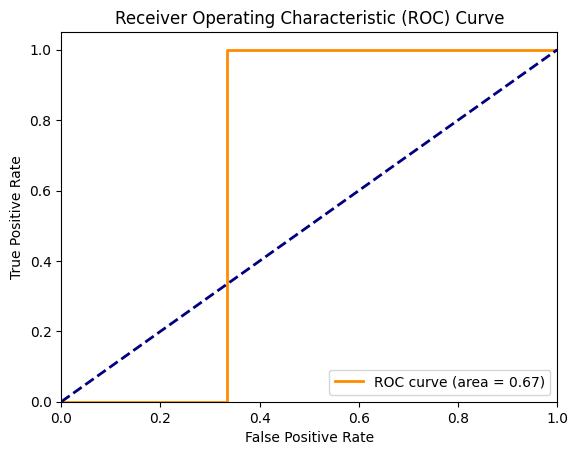

In [80]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels (for binary classification)
y_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_bin[:, 1], y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ROC eğrisi, modelin çeşitli sınıflandırma eşiklerinde ne kadar iyi performans gösterdiğini görsel olarak gösterir; eğri **sol üst köşeye doğru kaydığında daha iyi model performansı** gösterir.

Daha yüksek bir AUC değeri, **modelin pozitif ve negatif sınıflar arasında ayrım** yapma konusunda genel olarak daha iyi bir yeteneğe sahip olduğunu gösterir.

Bu, **ROC ve AUC'yi, accuracy gibi diğer ölçümlerin yeterli olmayabileceği dengesiz sınıflandırma görevlerinde** modelleri değerlendirmek için özellikle yararlı hale getirir.

**Hyperparameter Tuning**

Hiperparametre ayarlaması, performansı artırmak için modelin parametrelerini optimize etmeye yardımcı olur.

**Grid Search**

Grid Search, bir dizi hiperparametre tanımladığınız ve değerlerinin tüm olası kombinasyonlarını aradığınız bir hiperparametre optimizasyonu yöntemidir.

Önceden tanımlanmış bir ızgaradaki her parametre kombinasyonunu ayrıntılı bir şekilde test ederek, belirtilen bir değerlendirme metriğine (örneğin, doğruluk, F1 puanı) göre en iyi performans gösteren yapılandırmayı bularak çalışır.

Bu arama süreci, hiperparametre alanını (örneğin, öğrenme oranı, ağaç sayısı vb. için değerler) belirtmeyi ve model için en uygun değerleri belirlemek üzere tüm olası kombinasyonları test etmeyi içerir.

In [71]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit grid search
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'max_depth': 15, 'n_estimators': 100}
Best cross-validation score: 0.96


Grid Search, hiperparametre alanını sistematik olarak keşfetmenize yardımcı olur ve tüm olası kombinasyonların dikkate alınmasını sağlar. Özellikle çok sayıda hiperparametre veya değerle hesaplama açısından maliyetli olabilse de, modeliniz için en uygun yapılandırmayı bulmak için kapsamlı bir yaklaşım sağlar. Bu yöntem, manuel ayarlamaya güvenmeden en iyi hiperparametre değerleri için kapsamlı bir arama istediğinizde kullanılabilir.

**Randomized Search**

**Randomized Search, hiperparametre optimizasyonu için Grid Search'a bir alternatiftir**; burada hiperparametrelerin tüm olası kombinasyonlarını test etmek yerine, hiperparametre alanından sabit sayıda rastgele kombinasyon örneklenir.

Bu yaklaşım, **hiperparametre sayısı veya her parametre için olası değerler büyük olduğunda** daha hızlı bir arama sağlar. Her kombinasyonu ayrıntılı bir şekilde test eden Grid Search aksine, Randomized Search, hiperparametre alanının bir alt kümesini rastgele seçer ve her hiperparametre kümesi için model performansını değerlendirir.

In [72]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter distributions
param_dist = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5)

# Fit randomized search
random_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'max_depth': 15}
Best cross-validation score: 0.96


*Randomized Search özellikle hiperparametre alanı büyük olduğunda veya hesaplama kaynakları sınırlı olduğunda faydalıdır.*

*Sadece sabit sayıda kombinasyonu örnekleyerek, Grid Search ile karşılaştırılabilir, performans sonuçları verirken daha hızlı iyi parametre yapılandırmaları bulabilir.*